In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential,Model
from tensorflow.keras.layers import Input,Conv2D,Dense,MaxPool2D,Flatten,AveragePooling2D
from tensorflow.keras.optimizers import Adam,SGD
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

In [2]:
data = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
(x_train,y_train) , (x_test,y_test) = data

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
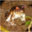

In [4]:
x_train[0]

In [5]:
x_val = x_train[:1000]
X_train = x_train[1000:]
y_val = y_train[:1000]
Y_train = y_train[1000:]

In [6]:
input_tensor = Input(shape=(32,32,3))
x = Conv2D(filters=6,kernel_size=(5,5),activation='tanh')(input_tensor)
x = AveragePooling2D(pool_size=(2,2),strides=2)(x)
x = Conv2D(filters=16, kernel_size=(5, 5), activation='tanh')(x)
x = AveragePooling2D(pool_size=(2, 2), strides=2)(x)
x = Conv2D(filters=120, kernel_size=(5, 5), activation='tanh')(x)
x = Flatten()(x)
x = Dense(84, activation='tanh')(x)
output_tensor = Dense(10,activation='softmax')(x)

model = Model(inputs=input_tensor,outputs=output_tensor)

In [7]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 1, 1, 120)      │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,006 (242.21 KB)

 Trainable params: 62,006 (242.21 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
sgd_optimizer = SGD(
    learning_rate = 0.01
)

In [9]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience = 7
)

In [10]:
model.compile(optimizer=sgd_optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
histroy = model.fit(x=x_train,y=y_train,validation_data=(x_val,y_val),batch_size=128,epochs=50,callbacks=[early_stop])

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 31s 77ms/step - accuracy: 0.1846 - loss: 2.1812 - val_accuracy: 0.3150 - val_loss: 1.9117
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 75ms/step - accuracy: 0.3357 - loss: 1.8749 - val_accuracy: 0.4230 - val_loss: 1.6732
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 78ms/step - accuracy: 0.3802 - loss: 1.7403 - val_accuracy: 0.4250 - val_loss: 1.6476
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 29s 75ms/step - accuracy: 0.4035 - loss: 1.6781 - val_accuracy: 0.4360 - val_loss: 1.6141
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 75ms/step - accuracy: 0.4108 - loss: 1.6511 - val_accuracy: 0.4530 - val_loss: 1.5880
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 29s 74ms/step - accuracy: 0.4284 - loss: 1.6049 - val_accuracy: 0.4440 - val_loss: 1.6123
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 77ms/step - accuracy: 0.4320 - loss: 1.5903 - val_accuracy: 0.4630 - val_loss: 1.5668
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 29s 75ms/step - accuracy: 0.4378 - loss: 1.5758 - 

In [12]:
evaluation = model.evaluate(x=x_test,y=y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.5626 - loss: 1.2234


In [13]:
predictions = model.predict(x=x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [14]:
predictions

array([[2.68476605e-02, 3.87736149e-02, 8.01629722e-02, ...,
        8.98286887e-03, 5.16292974e-02, 8.93040560e-03],
       [1.09750628e-02, 3.13320719e-02, 5.07350604e-04, ...,
        2.19919257e-05, 9.48135614e-01, 8.43858812e-03],
       [1.81977838e-01, 5.58407940e-02, 9.92429536e-03, ...,
        7.51091307e-03, 6.62891746e-01, 7.37463608e-02],
       ...,
       [8.61615990e-05, 2.32506009e-05, 3.13684680e-02, ...,
        2.18095537e-02, 4.28637431e-05, 1.09273045e-04],
       [4.62261707e-01, 8.90575945e-02, 3.60231809e-02, ...,
        4.13863473e-02, 6.34023687e-03, 8.35707784e-03],
       [1.62799074e-03, 1.94547244e-03, 1.61952060e-02, ...,
        8.70571733e-01, 4.88710066e-04, 4.43429826e-03]], dtype=float32)

In [15]:
y_pred = np.argmax(predictions,axis=1)

In [16]:
y_pred

array([3, 8, 8, ..., 5, 0, 7])

In [17]:
y_test_lenet = y_test.flatten()

In [18]:
y_test_lenet

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [19]:
confusion_matrix = pd.crosstab(y_test_lenet,y_pred,rownames=['Actual'],colnames=['Predictions'])

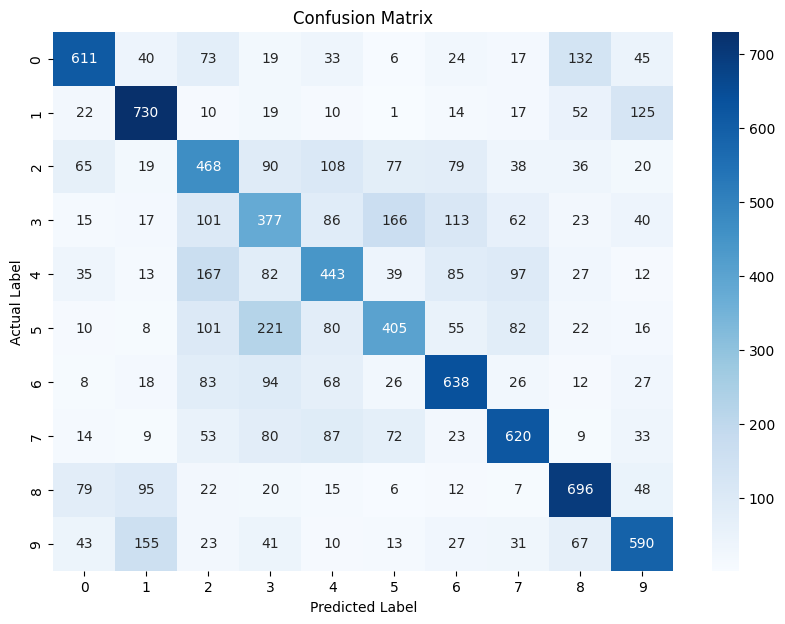

In [20]:
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [21]:
precision = precision_score(y_test_lenet, y_pred, average='macro')
recall = recall_score(y_test_lenet, y_pred, average='macro')
f1 = f1_score(y_test_lenet, y_pred, average='macro')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Precision: 0.5578
Recall: 0.5578
F1 Score: 0.5566


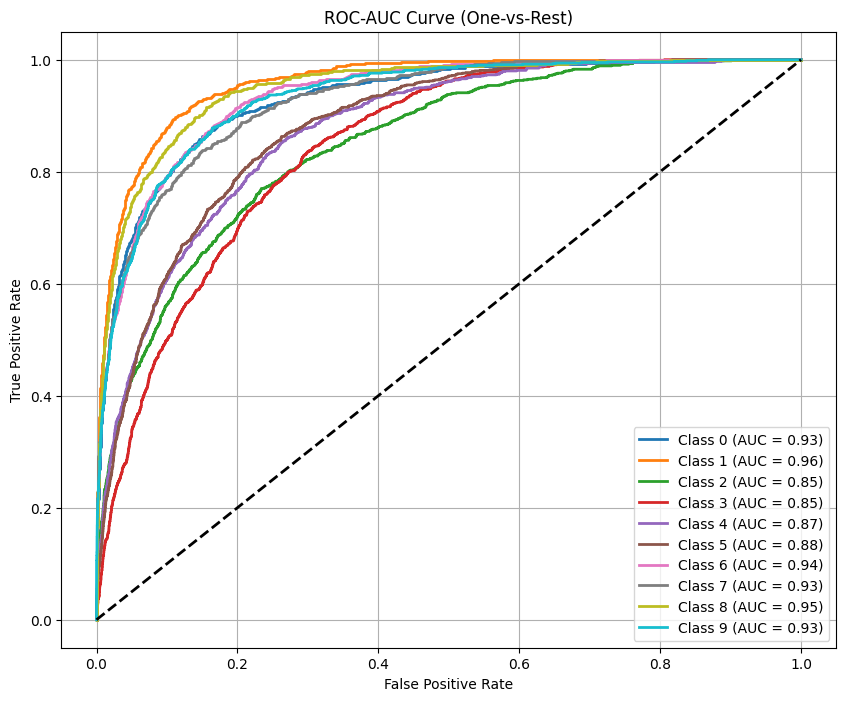

In [23]:
y_true_bin = label_binarize(y_test_lenet, classes=list(range(10)))
n_classes = y_true_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

# For each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for all classes
plt.figure(figsize=(10, 8))
colors = plt.cm.tab10(np.linspace(0, 1, 10))

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve (One-vs-Rest)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
